# Приоритизация гипотез, анализ результатов A/B-теста

В крупном интернет-магазине отделом маркетинга был выдвинут ряд гипотез для увеличения выручки, совместо с отделом аналитики требуется провести приоритизацию гипотез и проверить результаты A/B-теста

# Содержание
1. [Часть 1 - Приоритизация гипотез](#stage_1)
  * [Загрука и просмотр данных](#stage_1_load)
  * [Приоритизация гипотез](#stage_1_ICE_RICE)
  
  [Часть 1 - Вывод](#stage_1_summary)
        

2. [Часть 2 - Анализ A/B-теста](#stage_2)
  * [Загрука и просмотр данных](#stage_2_load)
  * [Кумулятивные метрики](#stage_2_cummetr)
    * [Выручка](#stage_2_cum_rev)
    * [Средний чек](#stage_2_cum_check)
    * [Конверсия](#stage_2_cum_conv)
  * [Выбросы](#stage_2_extr)
    * [Количество заказов](#stage_2_extr_orders)
    * [Средний чек](#stage_2_extr_check)
  * [Статистические тесты](#stage_2_stat_tests)
    * [По "сырым" данным](#stage_2_raw_data)
    * [По "чистым" данным](#stage_2_filtered_data)
    
  [Часть 2 - Вывод](#stage_2_summary)
  
  
3. [Общий вывод](#conclusion)

Для работы с данными загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy import stats as st

# Часть 1 - Приоритизация гипотез<a id="stage_1"></a>

## Загрука и просмотр данных<a id="stage_1_load"></a>

В нашем распоряжении имеется файл с выдвинутыми гипотезами и оценкой их параметров:

* **R**each — охват пользователей по 10-балльной шкале;
* **I**mpact — влияние на пользователей по 10-балльной шкале;
* **C**onfidence — уверенность в гипотезе по 10-балльной шкале;
* **E**fforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Загрузим его в переменную `hypothesis`

In [2]:
hypothesis = pd.read_csv('datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


## Приоритизация гипотез<a id="stage_1_ICE_RICE"></a>

Оценим каждую гипотезу методами ICE и RICE 

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

Выведем на экран таблицу отсортированную по оценке ICE

In [4]:
hypothesis.sort_values('ICE', ascending=False).style.background_gradient(cmap='Blues', subset=['ICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


Топ3 гипотезы следующие:
* Запустить акцию, дающую скидку на товар в день рождения, **оценка ICE - 16.20**
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, **оценка ICE - 13.33**
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, **оценка ICE - 11.20**

Все три гипотезы имеют большое влияние на пользователей, отдел маркетинга уверен что они сработают, затраты - средние

Отсортируем таблицу по оценке RICE и выведем ее на экран

In [5]:
hypothesis.sort_values('RICE', ascending=False).style.background_gradient(cmap='Blues', subset=['RICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


Топ3 гипотезы следующие:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, **оценка RICE - 112**
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, **оценка RICE - 56**
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, **оценка RICE - 40**

Когда в расчет оценки был добавлен параметр охвата пользователей Топ3 изменился - на первом месте оказалась гипотеза которая ранее была на третьем в связи с тем что у нее максимальный охват аудитории, вторая гипотеза из предыдущая списка опустилась на третье место, а первая гипотеза сразу на пятое в связи с очень низким охватом аудитории.

## Часть 1 - Вывод<a id="stage_1_summary"></a>

Мы провели приоритизацию гипотез методами ICE и RICE и увидели как сильно влияет охват аудитории на итоговые оценки.

**Запустить акцию, дающую скидку на товар в день рождения** - самая высоко оцененная методом ICE гипотеза, маркетологи уверены что она окажет большое положительное влияние на уровень выручки, сдвинута нами с первого места в очереди гипотез на проверку на пятое, в связи с тем, что охват аудитории у нее минимальный из возможных

**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** - самая высоко оцененная методом RICE гипотеза будет первой в очереди на проверку, не смотря на то что оценки влияния и уверенности в результате у нее несоколько ниже - охват пользователей у нее максимальный

# Часть 2 - Анализ A/B-теста<a id="stage_2"></a>

## Загрука и просмотр данных<a id="stage_2_load"></a>

Загрузим результаты проведенного A/B-теста в переменные

In [6]:
orders = pd.read_csv('datasets/orders.csv')
visitors = pd.read_csv('datasets/visitors.csv')

### orders

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице содержится следующая информация:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

В таблице нет пропущенных данных, требуется привести наименования столбцов в нижний регистр и изменить тип данных столбца с датой на `datetime`

Изменим регистр в наименования столбцов

In [9]:
orders.columns = orders.columns.str.lower()

Изменим тип данных в столбце с датой

In [10]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

Проверим таблицу на дубли

In [11]:
orders.duplicated().sum()

0

Убедимся в том что каждый пользователь попал в одну группу теста

In [12]:
orders.pivot_table(index='visitorid', values='group', aggfunc=(pd.Series.nunique))['group'].value_counts()

1    973
2     58
Name: group, dtype: int64

58 пользователей, соверавших покупки, попали в обе группы теста

Создадим массив с их уникальными идентификаторами

In [13]:
defect_users = orders.pivot_table(index='visitorid', values='group', 
                                  aggfunc=(pd.Series.nunique)).reset_index().\
                      query('group > 1')['visitorid']

Определим сколько покупок сделали эти пользователи

In [14]:
orders[orders['visitorid'].isin(defect_users)].sort_values('visitorid')

,transactionid,visitorid,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


181 запись

In [15]:
len(orders[orders['visitorid'].isin(defect_users)].sort_values('visitorid')) / len(orders) * 100

15.121136173767752

Всего таких записей 15%, много, но, к сожалению, мы должны их удалить, так как пользователи, входящие в этот перечень, попали в обе группы и сведения об их деятельности во время теста не могут быть использованы для нахождения различий между группами

In [16]:
orders = orders.drop(orders[orders['visitorid'].isin(defect_users)].index).reset_index(drop=True)

### visitors

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Представлены следующие сведения:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

В таблице нет пропусков, требуется изменить тип данных поля с датой

Приведение даты к формату `datetime`

In [19]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Проверим таблицу на дубли

In [20]:
visitors.duplicated().sum()

0

## Вывод

Мы загрузили данные в переменные и методом `info` провели беглый анализ, выяснили что в данных нет пропусков (это хороший знак, означает что сбор данных с сайта работает без ошибок)

Поля содержащие даты понадобилось привести к типу данных `dstetime`, что стандартно для импорта информации из csv

Углубленный анализ, а именно проверка вхождения пользователей в группы, обнаружил что 15% покупок во время теста совершали 58 пользователей которые попали в обе группы, мы вынуждены были их удалить в  связи с тем что сведения об их активности могут исказить результаты анализа проведенного A/B-теста

## Кумулятивные метрики<a id="stage_2_cummetr"></a>

Для расчета кумулятивных метрик мы должны агрегировать имеющиеся данные по датам теста и группам

Создадим таблицу уникальных пар "дата-группа теста"

In [21]:
date_group_pairs = orders[['date','group']].drop_duplicates()
date_group_pairs.head(6)

,date,group
0,2019-08-15,B
6,2019-08-15,A
35,2019-08-16,A
37,2019-08-16,B
45,2019-08-01,A
54,2019-08-01,B


Агрегируем заказы используя лямбда функцию которая создает срезы заказов для каждой уникальной пары "дата-группа теста" (по дату и все что было раньше) и высчитывает в них количество заказов, уникальных покупателей и суммарную выручку за период

In [22]:
orders_agg = date_group_pairs.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].\
                              agg({'date':'max',
                                   'group':'max',
                                   'transactionid':pd.Series.nunique,
                                   'visitorid':pd.Series.nunique,
                                   'revenue':'sum'}), axis=1).sort_values(['date','group'])
orders_agg.head(6)

,date,group,transactionid,visitorid,revenue
45,2019-08-01,A,23,19,142779
54,2019-08-01,B,17,17,59758
149,2019-08-02,A,42,36,234381
147,2019-08-02,B,40,39,221801
245,2019-08-03,A,66,60,346854
328,2019-08-03,B,54,53,288850


Подобным образом агрегируем сведения по посещениям за периоды

In [23]:
visitors_agg = date_group_pairs.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
                                agg({'date':'max',
                                     'group':'max',
                                     'visitors':'sum'}), axis=1).sort_values(['date','group'])
visitors_agg.head(6)

,date,group,visitors
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845
328,2019-08-03,B,1803


Объединим обе таблицы в одну и переименуем столбцы

In [24]:
cumulative_data = orders_agg.merge(visitors_agg, on=['date','group'], how='left')
cumulative_data.columns = ['date','group','orders','buyers', 'revenue', 'visitors']
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803


Разделим таблицу на срезы по группам теста

In [25]:
cumulative_data_A = cumulative_data.query('group == "A"').copy()
cumulative_data_B = cumulative_data.query('group == "B"').copy()

### Выручка<a id="stage_2_cum_rev"></a>

Построим график динамики накопления выручки по обеим группам за рассматриваемый период

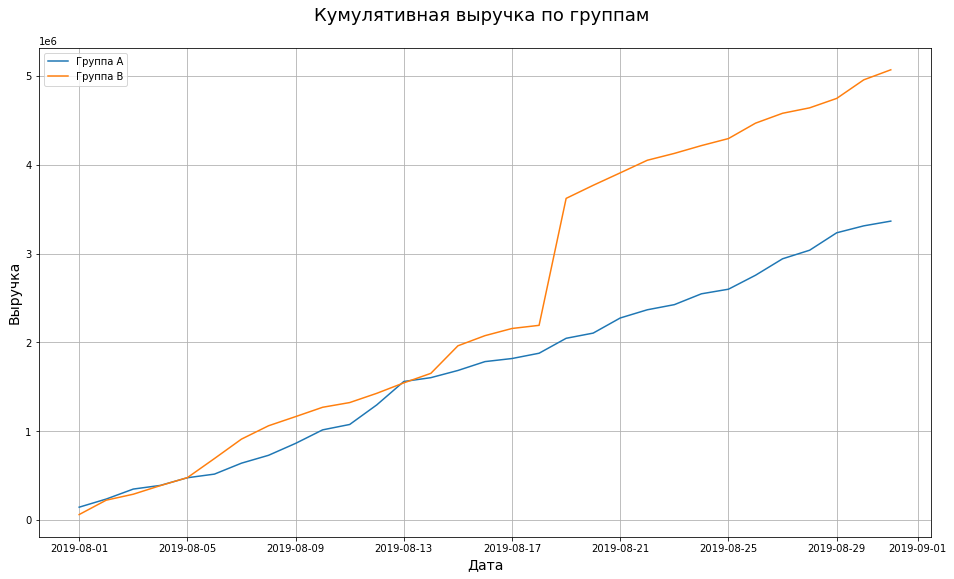

In [26]:
plt.figure(figsize=(16,9))
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue'])
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue'])
plt.grid(True)
plt.legend(['Группа A','Группа B'])
plt.title('Кумулятивная выручка по группам \n', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.show()

В обеих группах наблюдается рост выручки, в группе A он равномерный на всем протяжении теста, а в группе B виден выброс в середине периода

### Средний чек<a id="stage_2_cum_check"></a>

Отобразим на графике кумулятивное изменение среднего чека в каждой группе

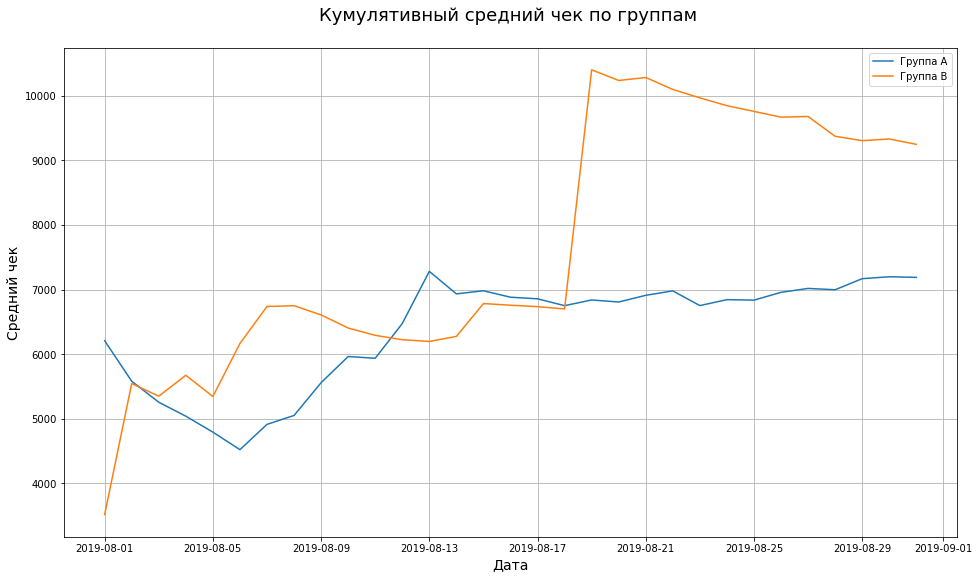

In [27]:
plt.figure(figsize=(16,9))
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue']/cumulative_data_A['orders'])
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue']/cumulative_data_B['orders'])
plt.grid(True)
plt.legend(['Группа A','Группа B'])
plt.title('Кумулятивный средний чек по группам \n', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.show()

Выброс в группе B, который мы видели на графике кумулятивной выручки, мы также можем наблюдать и на этом графике, кроме того мы видем что и в группе A происходили аномальные покупки (наблюдение за 2018-08-13)

Для того чтобы построить график относительного изменения среднего чека между группами нам необходимо объединить их в одну таблицу

In [28]:
merged_revenue = cumulative_data_A[['date','revenue','orders']].merge(cumulative_data_B[['date','revenue','orders']], 
                                                                      on='date', suffixes=['A','B'])

Построим график

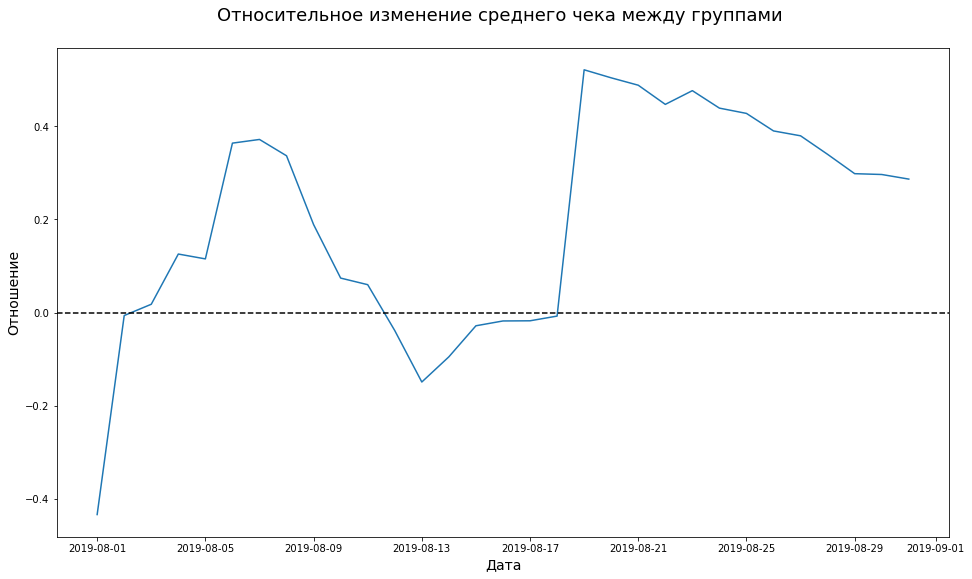

In [29]:
plt.figure(figsize=(16,9))
plt.plot(merged_revenue['date'], 
         (merged_revenue['revenueB']/merged_revenue['ordersB'])/(merged_revenue['revenueA']/merged_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение среднего чека между группами \n', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Отношение', fontsize=14)
plt.show()

Мы видим что кумулятивный средний чек в группе B выше группы A на протяжении всего теста (за исключением момента когда произошел выброс в группе A

### Конверсия<a id="stage_2_cum_conv"></a>

Для отображения на графике рассчитаем в каждом срезе данных кумулятивную конверсию за период по группам

In [30]:
cumulative_data_A['conversion'] = cumulative_data_A['buyers']/cumulative_data_A['visitors']
cumulative_data_B['conversion'] = cumulative_data_B['buyers']/cumulative_data_B['visitors']

График

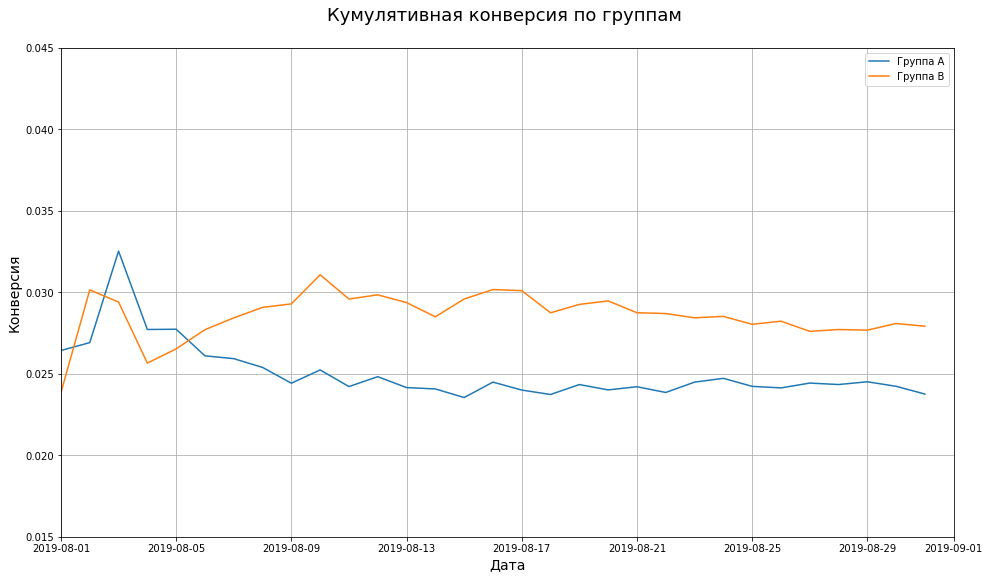

In [31]:
plt.figure(figsize=(16,9))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'])
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'])
plt.grid(True)
plt.legend(['Группа A','Группа B'])
plt.title('Кумулятивная конверсия по группам \n', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Конверсия', fontsize=14)
plt.axis(['2019-08-01', '2019-09-01', 0.015, 0.045])
plt.show()

В начале теста был момент когда конверсия в группе A была выше чем в группе B, но к концу рассматриваемого периода конверсии стабилизировались и мы видим, что конвесрия в группе B выше

Объединим таблицы для рассчета относительного изменения и отображения его на графике

In [32]:
merged_conversion = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], 
                                                                   on='date', suffixes=['A','B'])

Построим график

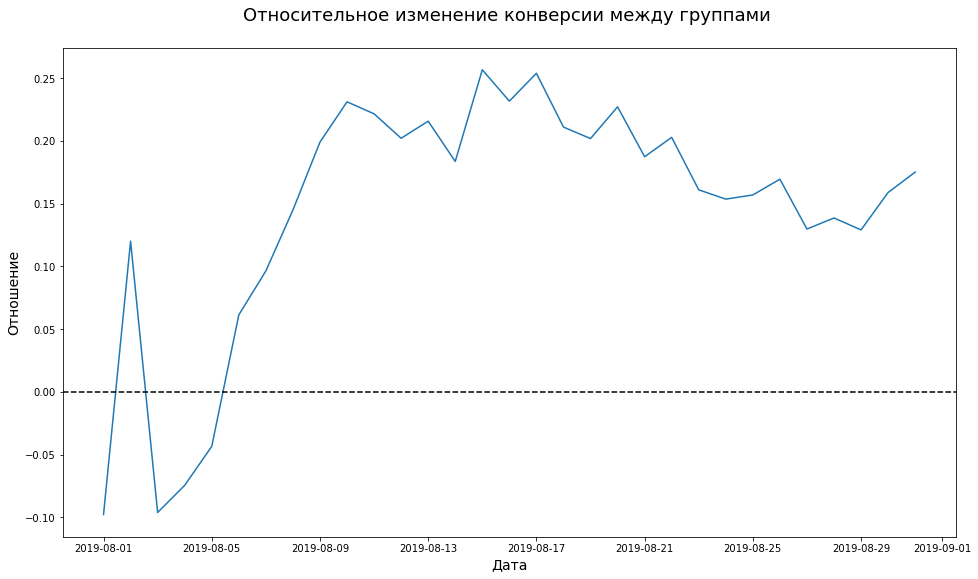

In [33]:
plt.figure(figsize=(16,9))
plt.plot(merged_conversion['date'], merged_conversion['conversionB']/merged_conversion['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение конверсии между группами \n', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Отношение', fontsize=14)
plt.show()

Относительное изменение подтверждает предыдущие наблюдения - конверсия в группе B выше, хотя разница и снизилась по сравнению с серединой теста

## Вывод

Результаты анализа кумулятивных метрик по итогам теста следующие:
1. Выручка в группе B выше
2. Средний чек в группе B выше, но на графике видно что эта метрика снижается после выброса к реальнмоу уровню
3. Конверсия в группе B выше но результат в конце теста хуже чем в середине, это может свидетельствовать о завершении стабилизации

## Выбросы<a id="stage_2_extr"></a>

### Количество заказов<a id="stage_2_extr_orders"></a>

Для анализа количества заказов по пользователем создадим сводную таблицу в которой посчитаем сколько заказов приходится на каждого уникального пользователя

In [34]:
orders_per_visitor = orders.pivot_table(index='visitorid', values='transactionid', aggfunc='count')

Отобразим распределение на точечном графике

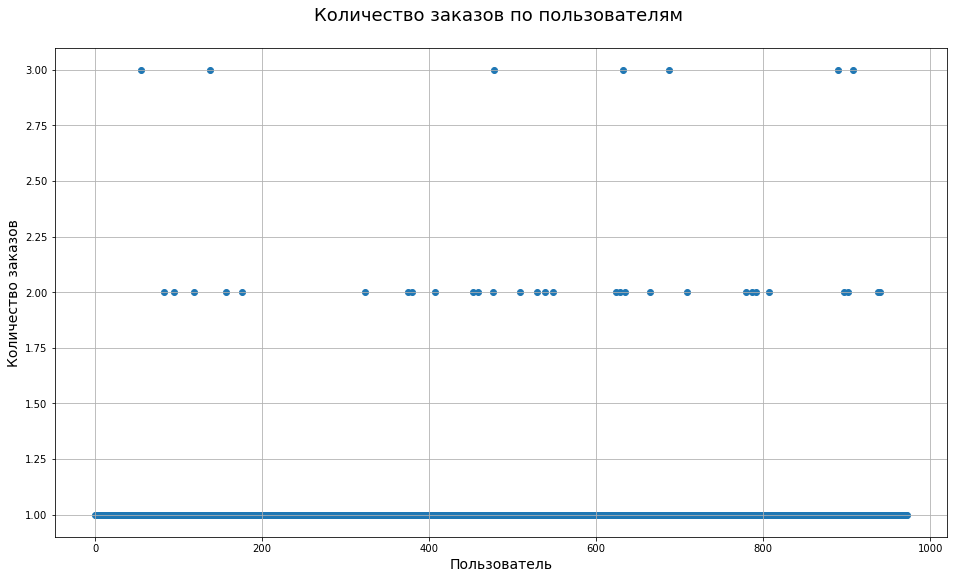

In [35]:
x_for_scatter = pd.Series(range(0, len(orders_per_visitor)))
plt.figure(figsize=(16,9))
plt.scatter(x_for_scatter, orders_per_visitor['transactionid'])
plt.grid(True)
plt.title('Количество заказов по пользователям \n', fontsize=18)
plt.xlabel('Пользователь', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.show()

Подавляющая масса пользователей во время теста совершила один заказ

Выясним распределение по 95 и 99 перцентилям 

In [36]:
orders_percentile = pd.DataFrame(np.percentile(orders_per_visitor['transactionid'], [95,99]), columns=['orders'])
orders_percentile['%'] = [95,99]
orders_percentile

,orders,%
0,1.0,95
1,2.0,99


99% пользователей совершили 2 или меньше заказов, все что выше примем за аномальный уровень количества заказов

### Средний чек<a id="stage_2_extr_check"></a>

Отобразим распределение на точечном графике

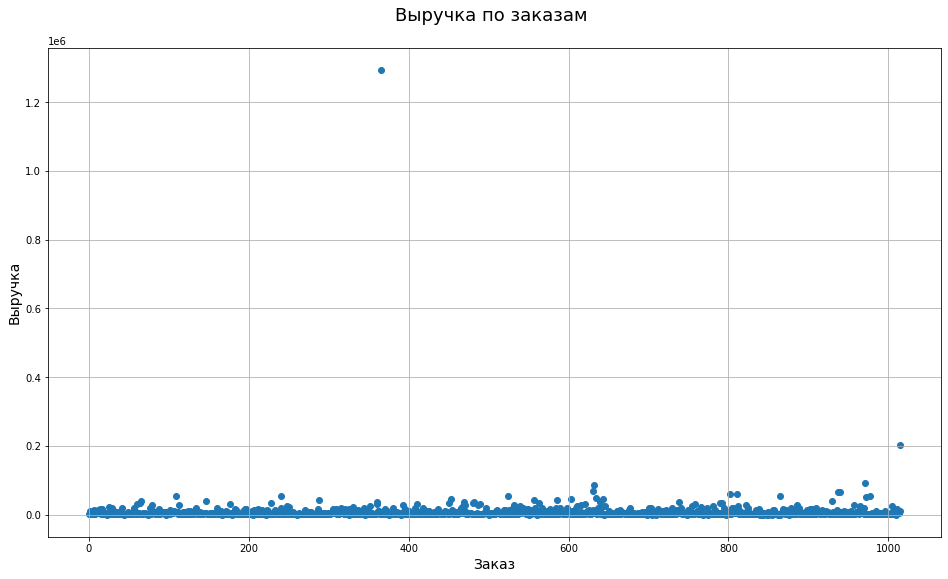

In [37]:
orders
x_for_scatter = pd.Series(range(0, len(orders)))
plt.figure(figsize=(16,9))
plt.scatter(x_for_scatter, orders['revenue'])
plt.grid(True)
plt.title('Выручка по заказам \n', fontsize=18)
plt.xlabel('Заказ', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.show()

Посчитаем 95 и 99 перцентили

In [38]:
revenue_percentile = pd.DataFrame(np.percentile(orders['revenue'], [95,99]), columns=['revenue'])
revenue_percentile['%'] = [95,99]
revenue_percentile

,revenue,%
0,26785.0,95
1,53904.0,99


Средий чек 99% покупок укладывается в 53904, все что выше примем за аномально высокий чек

## Вывод

Анализ выбросов в количестве заказов на пользователей и по средним чекам за покупки показал что 99% пользователей совершили 2 и меньше заказов, 99% средних чеков дешевле чем 53904

## Статистические тесты<a id="stage_2_stat_tests"></a>

В результате анализа A/B-теста мы выяснили что между группами имеется разница - конверсия и средний чек в группе B выше чем в группе A, теперь проведем непараметрический тесты Уилкоксона-Манна-Уитни для того чтобы выяснить, является ли разница между наблюденями статистически значимой

При проведении статистических тестов уровень значимости примем 0.05

In [39]:
alpha = 0.05

### По "сырым" данным<a id="stage_2_raw_data"></a>

### Конверсия

Для того чтобы провести статистический тест конверсии нам необходимо создать массивы данных по каждой группе: количество покупок каждого пользователя

Сначала создадим массив с количеством покупок каждого пользователя который совершал покупки

In [40]:
buyers_A = orders.query('group == "A"').pivot_table(index='visitorid', 
                                                    values='transactionid', 
                                                    aggfunc='count').reset_index()['transactionid']
buyers_B = orders.query('group == "B"').pivot_table(index='visitorid', 
                                                    values='transactionid', 
                                                    aggfunc='count').reset_index()['transactionid']

Создадим массивы в которые запишем нулевое количество покупок для остальных пользователей

In [41]:
no_buyers_A = pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(buyers_A)))
no_buyers_B = pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(buyers_B)))

Объединим их

In [42]:
conversion_test_sampleA = pd.concat([buyers_A, no_buyers_A])
conversion_test_sampleB = pd.concat([buyers_B, no_buyers_B])

Преждем чем проводить тесты рассчитаем конверсию и относительную разницу между группами

In [43]:
print('Конверсия в группе A: {:.2%}'.format(conversion_test_sampleA.mean()))
print('Конверсия в группе B: {:.2%}'.format(conversion_test_sampleB.mean()))
print('Относительное изменение: {:.2%}'.format(conversion_test_sampleB.mean() / conversion_test_sampleA.mean() - 1))

Конверсия в группе A: 2.50%
Конверсия в группе B: 2.90%
Относительное изменение: 15.98%


Конверсия в группе B на 15.98% выше чем в группе A

Проведем статистический тест

нулевая гипотеза - разница в конверсии по сырым данным между группами B и A статистически не значима и может быть случайной
  
альтернативная гипотеза - разница в конверсиях между группами статистически значима

In [44]:
print('p-значение: ', st.mannwhitneyu(conversion_test_sampleA, conversion_test_sampleB)[1])

if st.mannwhitneyu(conversion_test_sampleA, conversion_test_sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.0055090420550073455
Отвергаем нулевую гипотезу: разница статистически значима


По сырым данным разница между выборками статистически значима, больший показатель конверсии в группе B не случаен

### Средний чек

Подготовим массивы данных для тестов

In [45]:
revenue_test_sampleA = orders.query('group == "A"')['revenue']
revenue_test_sampleB = orders.query('group == "B"')['revenue']

Рассчитаем средний чек в группах и относительное изменение

In [46]:
print('Средний чек в группе A: ', round(revenue_test_sampleA.mean(), 2))
print('Средний чек в группе B: ', round(revenue_test_sampleB.mean(), 2))
print('Относительная разница: {:.2%}'.format(revenue_test_sampleB.mean() / revenue_test_sampleA.mean() - 1))

Средний чек в группе A:  7189.44
Средний чек в группе B:  9249.95
Относительная разница: 28.66%


Средний чек в группе B на 28.66% больше среднего чека в группе A

Проведем статистический тест

нулевая гипотеза - отличие расчитанного по сырым данным среднего чека в группе B от среднего чека в группе A статистически не значимо и может быть случайным
  
альтернативная гипотеза - разница в среднем чеке между группами статистически значима

In [47]:
print('p-значение: ', st.mannwhitneyu(revenue_test_sampleA, revenue_test_sampleB)[1])

if st.mannwhitneyu(conversion_test_sampleA, conversion_test_sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.41474544990747664
Отвергаем нулевую гипотезу: разница статистически значима


По сырым данным разница между средним чеком в группах статистически значима

### По "чистым" данным<a id="stage_2_filtered_data"></a>

На этапе анализа выбросов мы выяснили что число заказов больше 4 и заказы дороже чем 58233.2 аномальны для нашей выборки, рассчитаем количество таких пользователей

In [48]:
extr_orders_users = orders_per_visitor.query('transactionid > 2').reset_index()['visitorid']
extr_revenue_users = orders.query('revenue > 53904')['visitorid']
print('Пользователей с аномальным количеством заказов:', len(extr_orders_users))
print('Пользователей с аномальным средним чеком за заказ:', len(extr_revenue_users))

Пользователей с аномальным количеством заказов: 7
Пользователей с аномальным средним чеком за заказ: 9


Объединим их в один массив

In [49]:
extr_orders = pd.concat([extr_orders_users,extr_revenue_users])

Найдем дубли

In [50]:
extr_orders.duplicated().sum()

0

Дублей нет, выведем количество аномальных пользователей

In [51]:
print('Аномальных пользователей:', len(extr_orders))

Аномальных пользователей: 16


Теперь отфильтруем таблицу `orders` - удалим из нее аномальных пользователей

In [52]:
filtered_orders = orders[~orders['visitorid'].isin(extr_orders)]

### Конверсия

Аналогично сырым данным сформируем массивы пользователей из количества их покупок

In [53]:
filtered_buyers_A = filtered_orders.query('group == "A"').pivot_table(index='visitorid', 
                                                                      values='transactionid', 
                                                          aggfunc='count').reset_index()['transactionid']
filtered_buyers_B = filtered_orders.query('group == "B"').pivot_table(index='visitorid', 
                                                                      values='transactionid', 
                                                          aggfunc='count').reset_index()['transactionid']

Добавим пользователей без покупок в виде нулей

In [54]:
filtered_no_buyers_A = pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(filtered_buyers_A)))
filtered_no_buyers_B = pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(filtered_buyers_A)))

Объединим массивы

In [55]:
filtered_conversion_test_sampleA = pd.concat([filtered_buyers_A, filtered_no_buyers_A])
filtered_conversion_test_sampleB = pd.concat([filtered_buyers_B, filtered_no_buyers_B])

Рассчитаем конверсию и разницу

In [56]:
print('Конверсия в группе A: {:.2%}'.format(filtered_conversion_test_sampleA.mean()))
print('Конверсия в группе B: {:.2%}'.format(filtered_conversion_test_sampleB.mean()))
print('Относительная разница: {:.2%}'.format(filtered_conversion_test_sampleB.mean() / filtered_conversion_test_sampleA.mean() - 1))

Конверсия в группе A: 2.39%
Конверсия в группе B: 2.83%
Относительная разница: 18.40%


После фильтрации данных конверсии снизились, но разница между группами в процентах увеличилась

Проведем статистический тест

нулевая гипотеза - разница в конверсии по очищенным данным между группами B и A статистически не значима и может быть случайной
  
альтернативная гипотеза - разница в конверсиях между группами статистически значима

In [57]:
print('p-значение: ', st.mannwhitneyu(filtered_conversion_test_sampleA, filtered_conversion_test_sampleB)[1])

if st.mannwhitneyu(filtered_conversion_test_sampleA, filtered_conversion_test_sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.004303616145335556
Отвергаем нулевую гипотезу: разница статистически значима


По отфильтрованным данным разница все еще статистически значима

### Средний чек

Сформируем массивы выручки по отфильтрованным данным

In [58]:
filtered_revenue_test_sampleA = filtered_orders.query('group == "A"')['revenue']
filtered_revenue_test_sampleB = filtered_orders.query('group == "B"')['revenue']

Рассчитаем разницу

In [59]:
print('Средний чек в группе A: ', round(filtered_revenue_test_sampleA.mean(), 2))
print('Средний чек в группе B: ', round(filtered_revenue_test_sampleB.mean(), 2))
print('Относительная разница: {:.2%}'.format(filtered_revenue_test_sampleB.mean() / filtered_revenue_test_sampleA.mean() - 1))

Средний чек в группе A:  6487.02
Средний чек в группе B:  6277.27
Относительная разница: -3.23%


Средний чек в группе B, после исключения выбросов, значительно снизился и теперь ниже чем средний чек в группе A на 3.23%

Проведем статистический тест

нулевая гипотеза - отличие расчитанного по сырым данным среднего чека в группе B от среднего чека в группе A статистически не значимо и может быть случайным
  
альтернативная гипотеза - разница в среднем чеке между группами статистически значима

In [60]:
print('p-значение: ', st.mannwhitneyu(filtered_revenue_test_sampleA, filtered_revenue_test_sampleB)[1])

if st.mannwhitneyu(filtered_revenue_test_sampleA, filtered_revenue_test_sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.39385224312204203
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


После фильтрации данных разница в среднем чеке между группами стала статистически не значимой

## Вывод

Мы провели статистические тесты по сырым и по очищенным от выбросов данным и получили следующие результаты:
* Конверсия в группе B выше чем в группе A как по сырым так и по чистым данным, разница статистически значима в обоих случаях
* Средний чек по сырым данным значительно выше в группе B, по чистым данным разница между группами  3.23%, статистические тесты показали что по сырым данным разница статистически значима, если отбросить выбросы то статистической разницы между выборками нет

## Часть 2 - Вывод<a id="stage_2_summary"></a>

После загрузки данных мы провели их проверку и обнаружили что 181 покупку совершили 58 пользователей попавшие в обе группы теста, эти данные мы вынуждены были удалить в связи с тем что они искажали результаты нашего теста

Мы провели анализ результатов A/B-теста, нашли выбросы в данных (более 2 заказов на пользователя и покупку больше чем на 53904), провели статистические тесты и определили следующее:

1. Средний чек в группе B выше чем в группе A по сырым данным и ниже по очищенным, статистически разница значима по сырым данным и отсуствует по очищеным, делаем вывод о том что **средний чек по двум группам не различается**
2. Конверсия в группе B выше чем в группе A по сырым и по чистым данным, разница статистически значима в обоих случаях, таким образом **конверсия в группе B лучше чем в группе A**

Основываясь на озвученных фактах можно принять решение о завершении A/B-теста, зафиксировав лучшие результаты в группе B

# Общий вывод<a id="conclusion"></a>

**Приоритизация гипотез**

Мы провели приоритизацию гипотез методами ICE и RICE и увидели как сильно влияет охват аудитории на итоговые оценки

После оценки гипотез методом RICE самая высоко оцененная методом ICE гипотеза была сдвинута нами с первого места, в очереди гипотез на проверку, на пятое, в связи с тем, что охват аудитории у нее минимальный из возможных. На первое место в очереди проверки мы выдвинули гипотезу **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** -  не смотря на то что оценки влияния и уверенности в результате у нее несоколько ниже - охват пользователей у нее максимальный

**Анализ результатов A/B-теста**

После загрузки данных мы провели их проверку и обнаружили что 15% покупок совершили пользователи попавшие в обе группы теста, для сохранения чистоты эксперимента нам пришлось их удалить

В процессе анализа результатов теста мы обнаружили выбросы в количестве покупок пользователей и в среднем чеке этих покупом. В связи с этим статистические гипотезы попарно в сырых и в очищенных данных, результаты следующие:

1. Средний чек в группе B выше чем в группе A по сырым данным и ниже по очищенным, статистически разница значима по сырым данным и отсуствует по очищеным, делаем вывод о том что **средний чек по двум группам не различается**
2. Конверсия в группе B выше чем в группе A по сырым и по чистым данным, разница статистически значима в обоих случаях, таким образом **конверсия в группе B лучше чем в группе A**

Основываясь на озвученных фактах можно **принять решение о завершении A/B-теста, зафиксировав лучшие результаты в группе B**